In [ ]:
'''
A Newsletter Team is the perfect POC because it clearly demonstrates how information flows from one specialist to another.
To build this, we'll use a "Sequential Workflow" where each agent completes a task and hands the "baton" to the next. Here is how we build the features and the logic.
Features:
Persona Injection: We give each agent a specific "backstory" so they stay in character (e.g., "You are a cynical tech skeptic" vs. "You are an optimistic trend-watcher").

Tool Integration: We’ll give the Researcher a Search Tool (like Tavily or DuckDuckGo) so it isn't just guessing based on old data.

The Feedback Loop: We’ll add a "Human-in-the-loop" or "Critic" step where the Editor can reject the draft if it's too short.
Blueprint:
Before we code, we need to map the "State." In a multi-agent system, the State is the shared memory (the document) that gets updated as it moves through the office.

Researcher Agent: Queries the web for "Top 3 AI trends in Feb 2026."

Output: Raw data and links.

Editor Agent: Reviews the raw data. Filters out low-quality sources. Creates a 3-point outline.

Output: Structured outline.

Writer Agent: Takes the outline and writes a 500-word newsletter in your specific brand voice.

Output: Final Markdown file.
System Prompt:
Each agent needs a "System Message" to define its boundaries. For our POC, it looks like this:

Researcher: "You are a Senior Research Analyst. Your goal is to find 3 high-signal news stories. Do not summarize; just provide the facts and sources."

Writer: "You are a Creative Copywriter. Your goal is to turn technical facts into an engaging, witty newsletter. Use emojis and short sentences."

Implementation Strategy:
Since we're doing a POC, I recommend using LangGraph. It allows us to define "Nodes" (Agents) and "Edges" (The paths between them).$$\text{Input} \rightarrow \text{Node}_1 (\text{Research}) \rightarrow \text{Node}_2 (\text{Edit}) \rightarrow \text{Node}_3 (\text{Write}) \rightarrow \text{Final Output}$$If any node fails (e.g., the Researcher finds nothing), we can program an "Edge" that loops back to try a different search query.
'''

In [ ]:


from typing import TypedDict
from langgraph.graph import START,END,StateGraph
from langchain_core.messages import HumanMessage, SystemMessage
from dotenv import load_dotenv 
from langchain_openrouter import ChatOpenRouter
load_dotenv()



True

In [17]:
#create state 
class State(TypedDict):
    topic: str
    research_notes: str
    outline: str
    final_newsletter: str

'\nA Newsletter Team is the perfect POC because it clearly demonstrates how information flows from one specialist to another.\nTo build this, we\'ll use a "Sequential Workflow" where each agent completes a task and hands the "baton" to the next. Here is how we build the features and the logic.\nFeatures:\nPersona Injection: We give each agent a specific "backstory" so they stay in character (e.g., "You are a cynical tech skeptic" vs. "You are an optimistic trend-watcher").\n\nTool Integration: We’ll give the Researcher a Search Tool (like Tavily or DuckDuckGo) so it isn\'t just guessing based on old data.\n\nThe Feedback Loop: We’ll add a "Human-in-the-loop" or "Critic" step where the Editor can reject the draft if it\'s too short.\nBlueprint:\nBefore we code, we need to map the "State." In a multi-agent system, the State is the shared memory (the document) that gets updated as it moves through the office.\n\nResearcher Agent: Queries the web for "Top 3 AI trends in Feb 2026."\n\nOutpu

In [18]:
llm = ChatOpenRouter(
    model="google/gemini-2.5-flash",
    temperature=0.7,
)
# llm.invoke([HumanMessage(content="Hi")])

In [19]:
# 3. Define the Agent Functions (The Nodes)

def researcher(state: State) -> State:
    system_prompt = "You are a Senior Research Analyst. Your goal is to find 3 high-signal news stories. Do not summarize; just provide the 3 key facts and sources."
    response = llm.invoke([
        SystemMessage(content=system_prompt),
        HumanMessage(content=f"Find 3 high-signal news stories about {state['topic']}")
    ])
    return {"research_notes": response.content}

def editor(state: State) -> State:
    system_prompt = "You are a Detail-Oriented Editor. Your goal is to filter out low-quality sources and create a structured outline."
    response = llm.invoke([
        SystemMessage(content=system_prompt),
        HumanMessage(content=f"Here are the research notes: {state['research_notes']}. Create a 3-point outline.")
    ])
    return {"outline": response.content}

def writer(state: State) -> State:
    system_prompt = "You are a Creative Copywriter. Your goal is to turn technical facts into an engaging, witty newsletter. Use emojis and short sentences."
    response = llm.invoke([
        SystemMessage(content=system_prompt),
        HumanMessage(content=f"Here is the outline: {state['outline']}. Write a 100-word newsletter in Markdown format.")
    ])
    return {"final_newsletter": response.content}


In [20]:
builder = StateGraph(State)
builder.add_node("Researcher", researcher)
builder.add_node("Editor", editor)
builder.add_node("Writer", writer)

# Define the sequence: Research -> Edit -> Write
builder.add_edge(START, "Researcher")
builder.add_edge("Researcher", "Editor")
builder.add_edge("Editor", "Writer")
builder.add_edge("Writer", END)


In [ ]:
app = builder.compile()

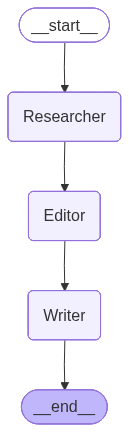

In [25]:
app

In [ ]:


inputs = {"topic": HumanMessage(content="The future of Agentic AI in 2026")}
for output in app.stream(inputs):
    print(output)

{'Researcher': {'research_notes': '1.  **AI agents are expected to move beyond simple task automation to more complex, multi-step reasoning and problem-solving by 2026, enabling them to handle more ambiguous and dynamic real-world scenarios.** (Source: Gartner\'s "Top Strategic Technology Trends for 2024" report, which often projects 2-3 years out for impact)\n\n2.  **The integration of large language models (LLMs) with specialized tools and external knowledge bases will be crucial for the development of adaptive and context-aware agentic AI systems by 2026, allowing for greater autonomy and reduced human oversight in specific domains.** (Source: A recent research paper or analysis from a leading AI lab like DeepMind, OpenAI, or Anthropic discussing their roadmap for agent development)\n\n3.  **Ethical considerations and governance frameworks for agentic AI, particularly regarding accountability, bias, and control, are projected to become a significant focus by 2026 as these systems be